In [1]:
%pylab inline
import numpy as np
from reconstruction import *
from scipy import ndimage
dat = np.loadtxt('../data/t4.txt')

Populating the interactive namespace from numpy and matplotlib


# Inverse problem

We wish to reconstruct surface ($z=0$) stresses $\sigma_{xz}(x,y)$, $\sigma_{yz}(x,y)$, from surface measurements $u_x$(x,y,z=0) where

$$u_x (\mathbf{r},z=0) = \int \left[G_{xy}(\mathbf{r}_\perp-\mathbf{r}_\perp^\prime , 0){\sigma_{yz}(\mathbf{r}_\perp^\prime)} +  G_{xx}(\mathbf{r}_\perp-\mathbf{r}_\perp^\prime , 0){\sigma_{xz}(\mathbf{r}_\perp^\prime)}\right] d\mathbf{r}_\perp. $$

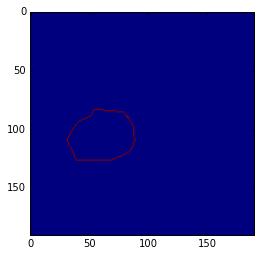

In [2]:
plt.imshow(dat[:,3].reshape((190,190)).transpose())


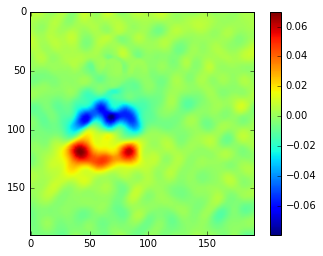

In [3]:
plt.imshow(dat[:,2].reshape((190,190)).transpose())
plt.colorbar()

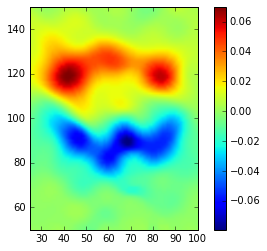

In [14]:
plt.imshow(dat[:,2].reshape((190,190)).transpose())
plt.xlim((25,100))
plt.ylim((50,150))
plt.colorbar()


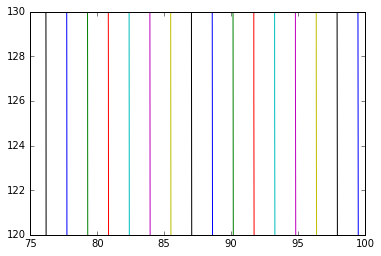

In [5]:
#plt.figure(figsize=(10,10))
#plt.xlim((50,150))
plt.xlim((75,100))
#plt.ylim((100,200))
plt.ylim((120,130))
for j in range(190):
    plt.plot(dat[(j*190):((j+1)*190),0]+dat[(j*190):((j+1)*190),2], dat[(j*190):((j+1)*190),1])

In [6]:
dat[:,3].reshape((190,190)).transpose()

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [7]:
ndimage.distance_transform_edt(dat[:,3].reshape((190,190)))

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [8]:
boundary = dat[:,3].reshape((190,190))
mask = np.zeros(boundary.shape)
for r in range(boundary.shape[0]):
    pts = np.where(boundary[r,:]==1)
    if(len(pts[0])>0):
        mini  = (min(min(pts)))
        maxi = max(max(pts))
        mask[r,mini:maxi]=1

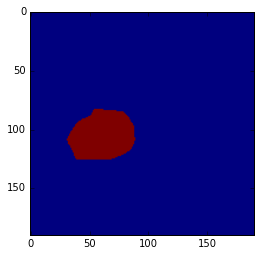

In [9]:
plt.imshow(mask.transpose())


In [10]:
distances = -ndimage.distance_transform_edt(mask.transpose())+ndimage.distance_transform_edt(1-mask.transpose())

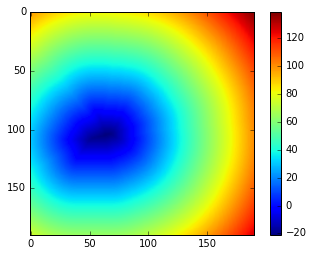

In [11]:
plt.imshow(distances)
plt.colorbar()

In [12]:
distances

array([[  99.02019996,   98.47842403,   97.94386147, ...,  137.53544998,
         138.29316686,  139.05394637],
       [  98.18350167,   97.63708312,   97.09788875, ...,  136.88316186,
         137.64446956,  138.40881475],
       [  97.34988444,   96.79876032,   96.25487001, ...,  136.23509093,
         137.        ,  137.76792079],
       ..., 
       [  73.24616031,   72.71863585,   72.20110802, ...,  124.27791437,
         125.09996003,  125.9245806 ],
       [  74.09453421,   73.57309291,   73.06161783, ...,  124.85191228,
         125.67020331,  126.49110641],
       [  74.94664769,   74.43117626,   73.92563831, ...,  125.43125607,
         126.24579201,  127.06297651]])

In [13]:
?plt.imshow